In [1]:
import pandas as pd
# advertiser_data = pd.read_csv('train/train_data_ads.csv', nrows=1000)
advertiser_data = pd.read_csv('train/train_data_ads.csv')
# advertiser_data

In [2]:
advertiser_data['pt_d'] = pd.to_datetime(advertiser_data['pt_d'], format='%Y%m%d%H%M')
advertiser_data['day_of_week'] = advertiser_data['pt_d'].dt.day_name()  
advertiser_data['hour'] = advertiser_data['pt_d'].dt.hour

clicked_data = advertiser_data[advertiser_data['label'] == 1]

In [8]:
import matplotlib.pyplot as plt
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', 
          '#ffd92f', '#e5c494', '#b3b3b3', '#a6cee3', '#1f78b4', 
          '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f']

In [5]:
def draw_pie_charts(column, ax1, ax2):
    clicked_data[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=colors, ax=ax1)
    ax1.set_title(f'{column.capitalize()} Group Distribution of Users Who Clicked Ads')
    ax1.set_ylabel('')
    advertiser_data[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=colors, ax=ax2)
    ax2.set_title(f'{column.capitalize()} Group Distribution of All Users')
    ax2.set_ylabel('')

def draw_pie_charts_with_big_categories(column, ax1, ax2):
    value_counts = clicked_data[column].value_counts()
    total_sum = value_counts.sum()
    big_categories = value_counts[value_counts >= 0.02 * total_sum].index
    clicked_data[column].apply(lambda x: x if x in big_categories else 'Others').value_counts().\
        plot.pie(autopct='%1.1f%%', startangle=140, colors=colors, ax = ax1)
    ax1.set_title(f'{column.capitalize()} Distribution of Users Who Clicked Ads')
    ax1.set_ylabel('') 

    value_counts_all = advertiser_data[column].value_counts()
    total_sum_all = value_counts_all.sum()
    big_categories_all = value_counts_all[value_counts_all >= 0.02 * total_sum_all].index
    advertiser_data[column].apply(lambda x: x if x in big_categories_all else 'Others').value_counts().\
        plot.pie(autopct='%1.1f%%', startangle=140, colors=colors, ax = ax2)
    ax2.set_title(f'{column.capitalize()} Distribution of All Users')
    ax2.set_ylabel('') 

## Task 1: Aggregate Statistics

### Age Group Distribution

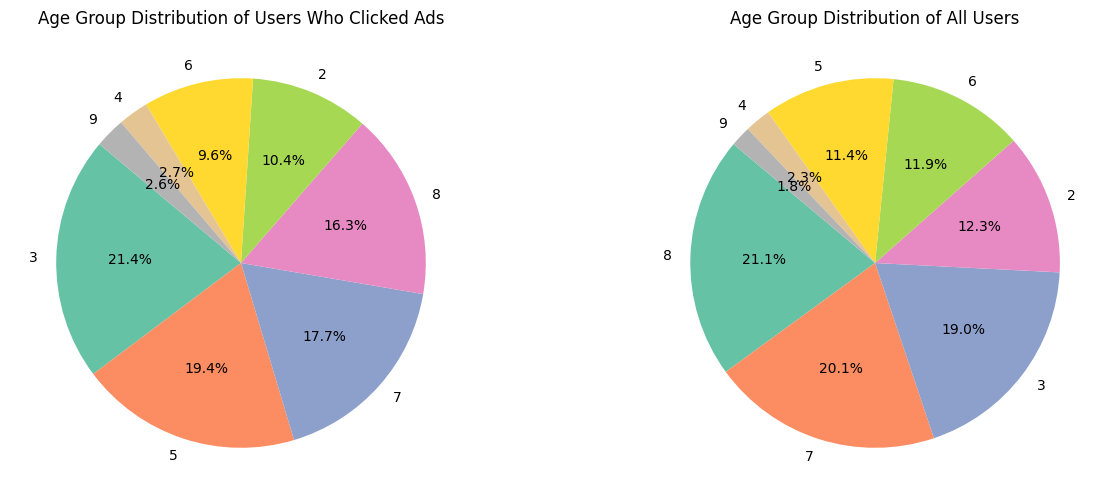

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
draw_pie_charts('age', ax1, ax2)

Uses who clicked the ads has a high proportion of age 5, lower proportion of age 8.

### Geographic Distribution

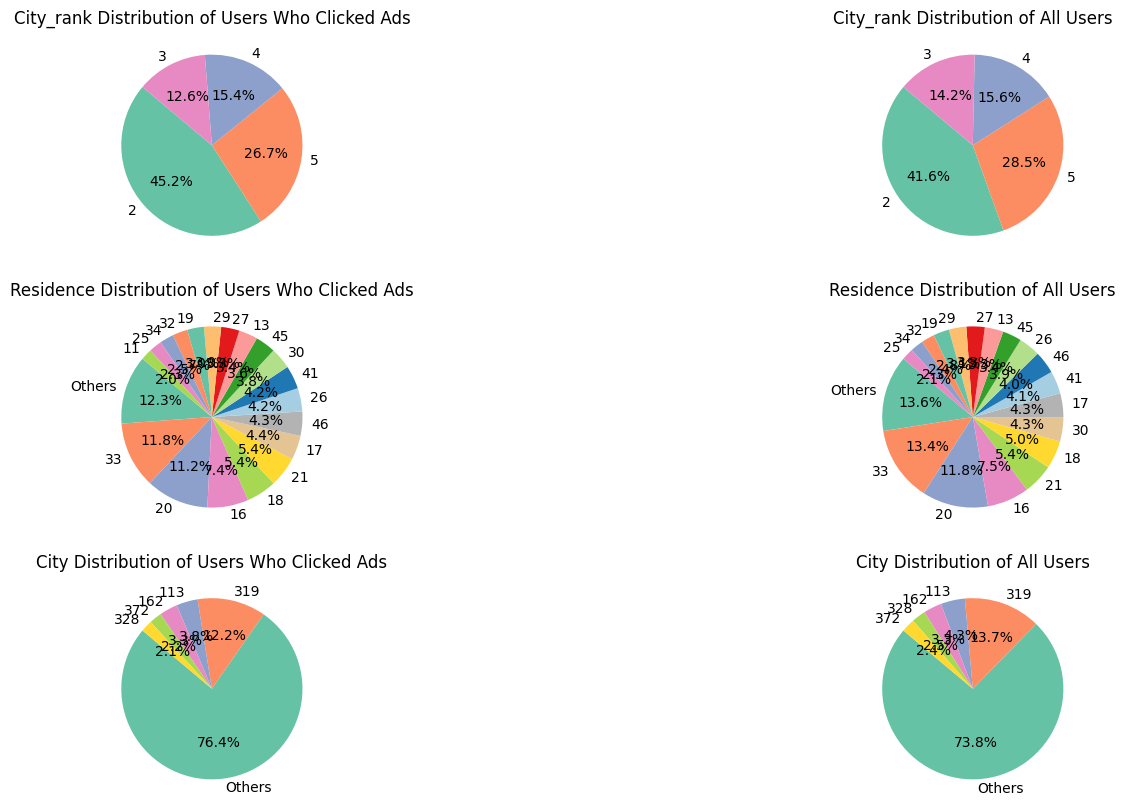

In [7]:
features = ['city_rank', 'residence', 'city']
fig, axes = plt.subplots(len(features), 2, figsize=(18, 10))

for i, column in enumerate(features):
    draw_pie_charts_with_big_categories(column, axes[i, 0], axes[i, 1])

Uses who clicked the ads has a high proportion of city rank 2, lower proportion of residence 33.

### Device Usage

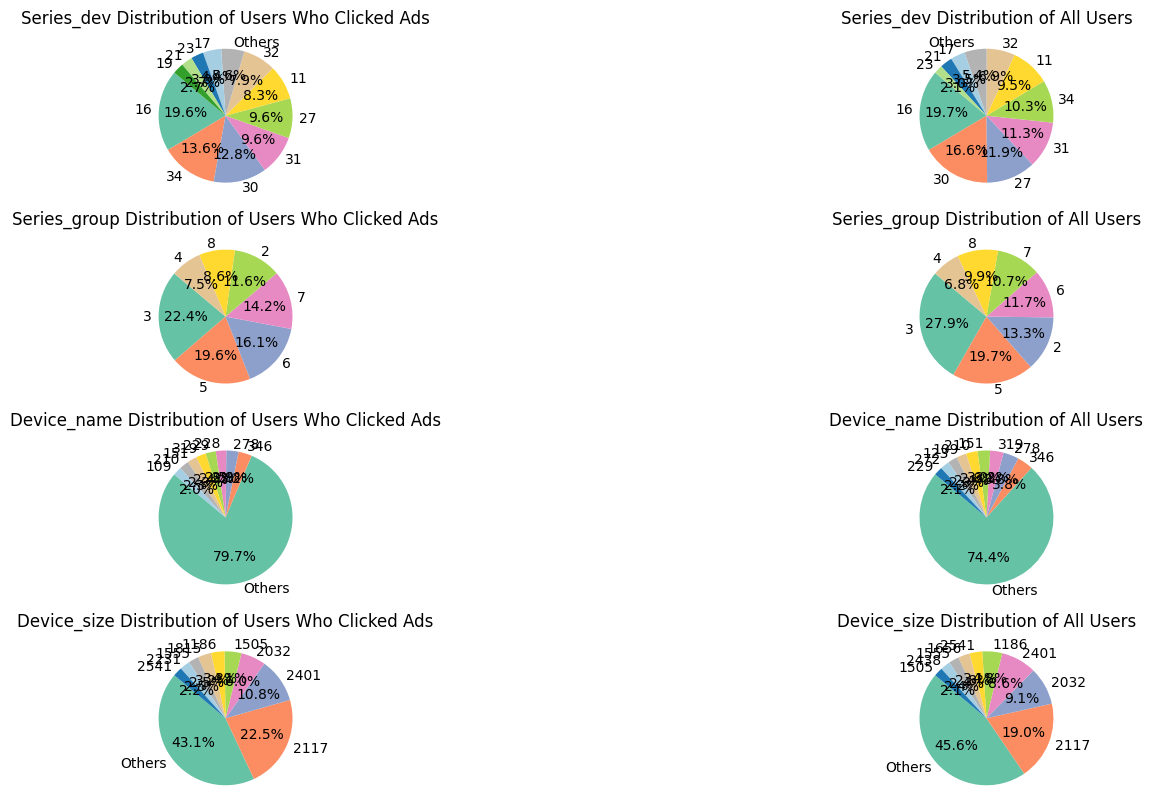

In [8]:
features = ['series_dev', 'series_group', 'device_name', 'device_size']
fig, axes = plt.subplots(len(features), 2, figsize=(18, 10))

for i, column in enumerate(features):
    draw_pie_charts_with_big_categories(column, axes[i, 0], axes[i, 1])

Uses who clicked the ads has a high proportion of series group 6, 7, lower proportion of series dev 34, 30, series group 3.

### Engagement Patterns

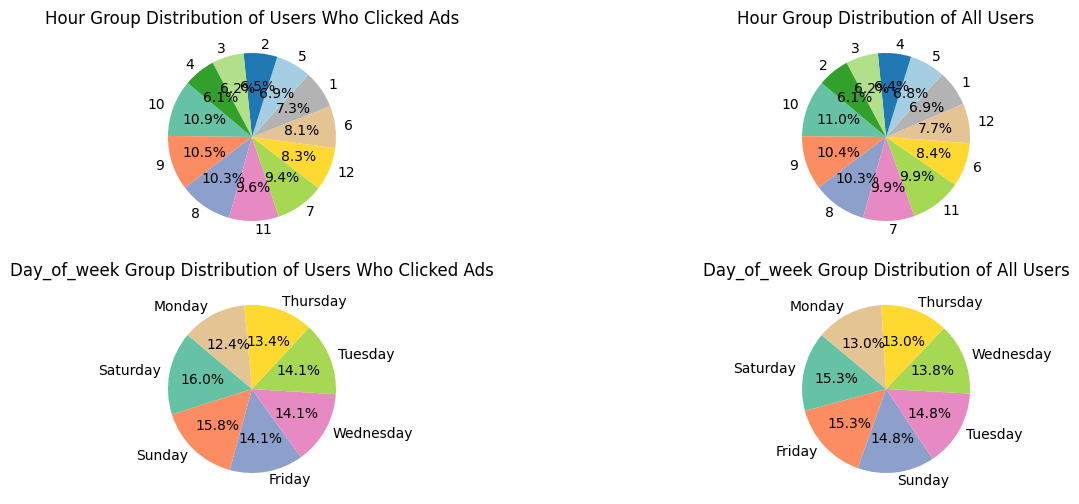

In [10]:
features = ['hour', 'day_of_week']
fig, axes = plt.subplots(len(features), 2, figsize=(15, 6))

for i, column in enumerate(features):
    draw_pie_charts(column, axes[i,0], axes[i,1])

There's no difference in engagement patterns between users who cliked the ads and all users.

### Content Preferences

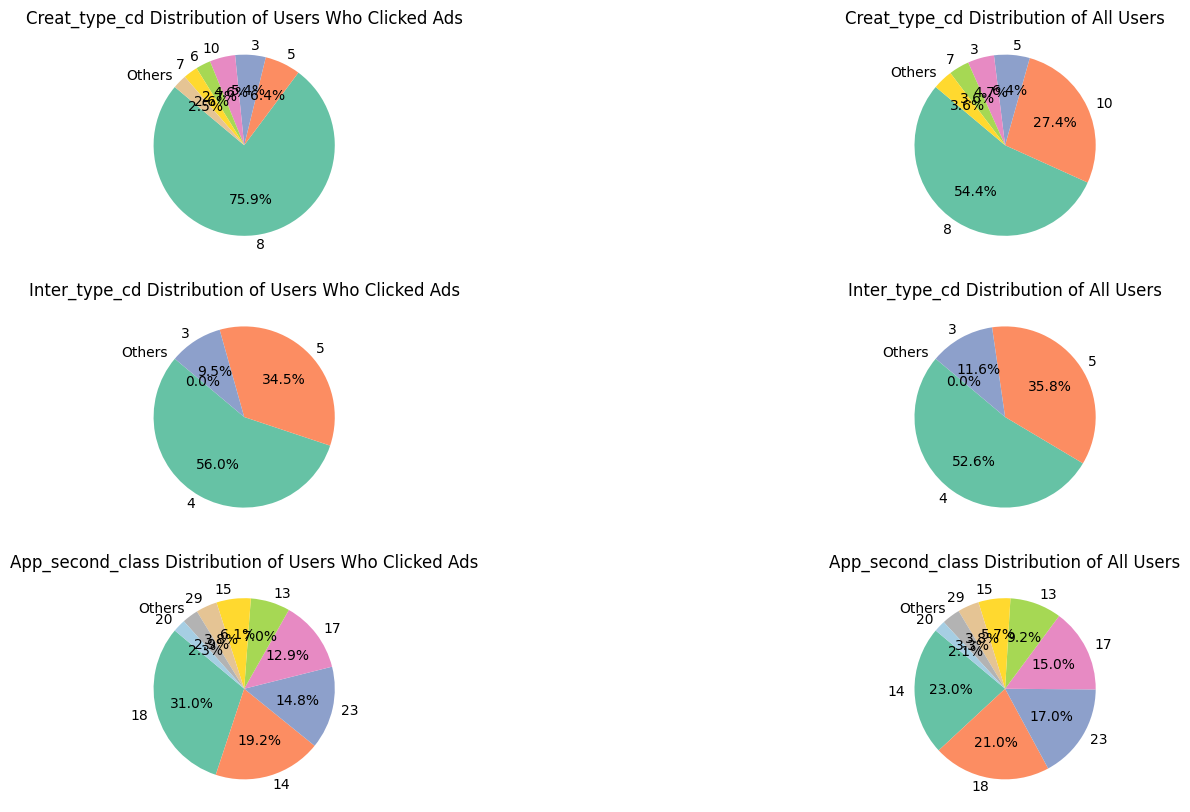

In [11]:
features = ['creat_type_cd','inter_type_cd','app_second_class']
fig, axes = plt.subplots(len(features), 2, figsize=(18, 10))

for i, column in enumerate(features):
    draw_pie_charts_with_big_categories(column, axes[i, 0], axes[i, 1])

Users prone to click create_type_cd 8, app_second class 18 more and create_type_cd 10, app_second class 14 less.

In [3]:
publisher_data = pd.read_csv('train/train_data_feeds.csv')
clicked_publisher_data = publisher_data[publisher_data['label'] == 1]

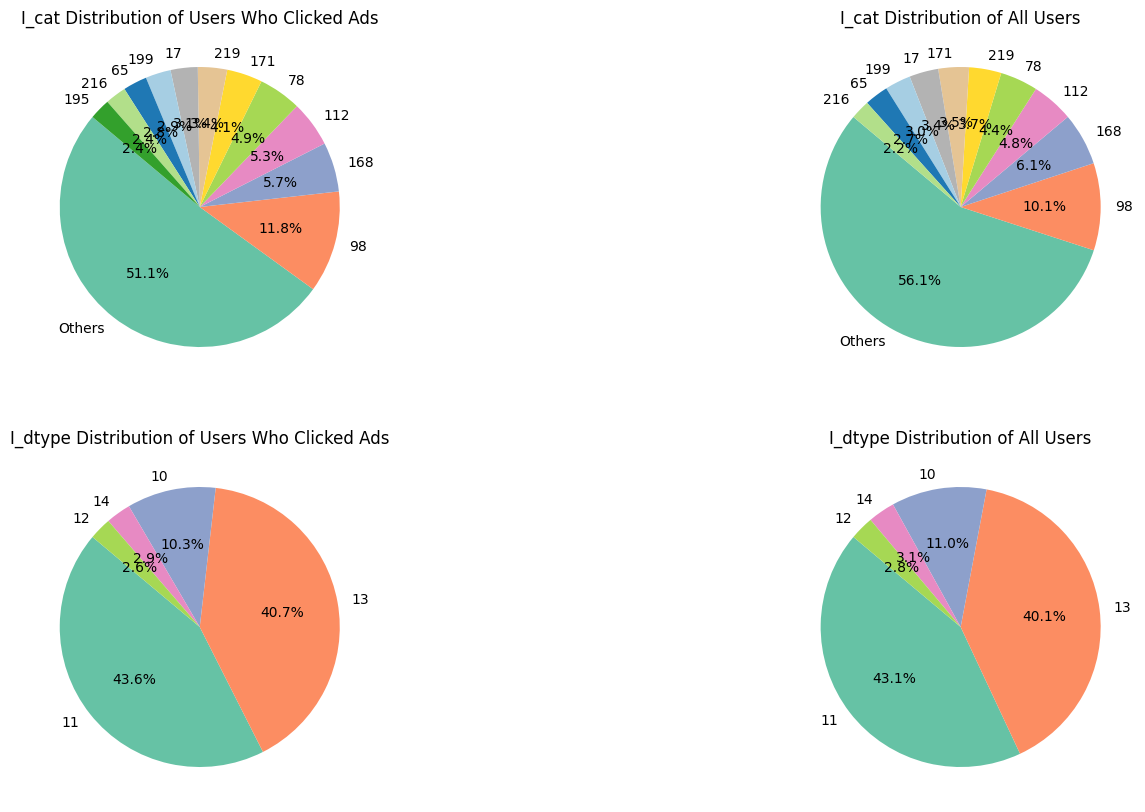

In [27]:
features = ['i_cat', 'i_dtype']
fig, axes = plt.subplots(len(features), 2, figsize=(18, 10))

for i, column in enumerate(features):
    value_counts = clicked_publisher_data[column].value_counts()
    total_sum = value_counts.sum()
    big_categories = value_counts[value_counts >= 0.02 * total_sum].index
    clicked_publisher_data[column].apply(lambda x: x if x in big_categories else 'Others').value_counts().\
        plot.pie(autopct='%1.1f%%', startangle=140, colors=colors, ax = axes[i, 0])
    axes[i, 0].set_title(f'{column.capitalize()} Distribution of Users Who Clicked Ads')
    axes[i, 0].set_ylabel('') 

    value_counts_all = publisher_data[column].value_counts()
    total_sum_all = value_counts_all.sum()
    big_categories_all = value_counts_all[value_counts_all >= 0.02 * total_sum_all].index
    publisher_data[column].apply(lambda x: x if x in big_categories_all else 'Others').value_counts().\
        plot.pie(autopct='%1.1f%%', startangle=140, colors=colors, ax = axes[i, 1])
    axes[i, 1].set_title(f'{column.capitalize()} Distribution of All Users')
    axes[i, 1].set_ylabel('') 

There's no obvious difference in the type between contents clicked and all contents.

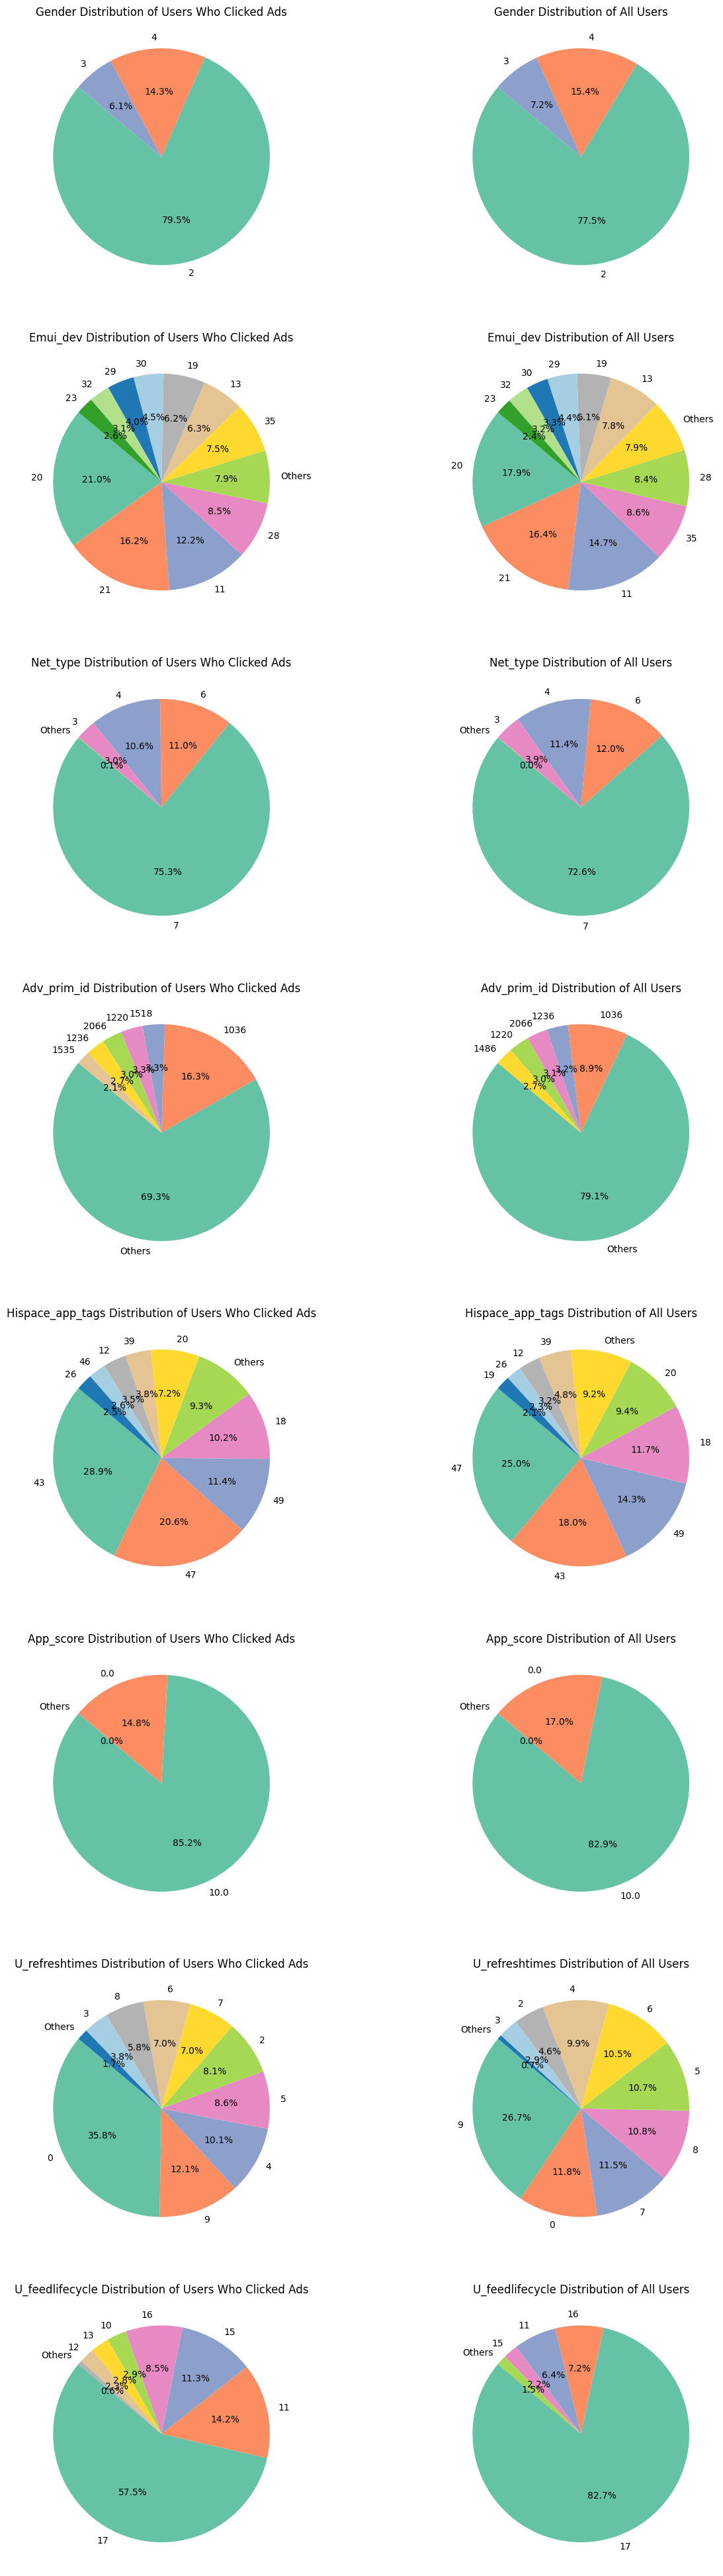

In [16]:
advertiser_other_columns = ['gender', 'emui_dev', 'net_type', 'adv_prim_id', 'hispace_app_tags', 'app_score', 'u_refreshTimes', 'u_feedLifeCycle']
fig, axes = plt.subplots(len(advertiser_other_columns), 2, figsize=(15, 50))

for i, column in enumerate(advertiser_other_columns):
    draw_pie_charts_with_big_categories(column, axes[i,0], axes[i,1])

Uses who clicked the ads has a high proportion of adv_prim_id 1036, hispace_app_tags 43, lower proportion of hispace_app_tags 47, U_feedlifecycle 17 and less refresh time.

## Task2: Machine Learning Predictor

In [4]:
advertiser_data['u_newsCatInterestsST_list'] = advertiser_data['u_newsCatInterestsST'].apply(lambda x: x.split('^'))
advertiser_data_ = advertiser_data[['label', 'u_newsCatInterestsST_list']]
advertiser_data_catinterest = advertiser_data_.explode('u_newsCatInterestsST_list')
clicked_data_ = advertiser_data_[advertiser_data_['label'] == 1]
clicked_data_catinterest = clicked_data_.explode('u_newsCatInterestsST_list')

Text(0, 0.5, '')

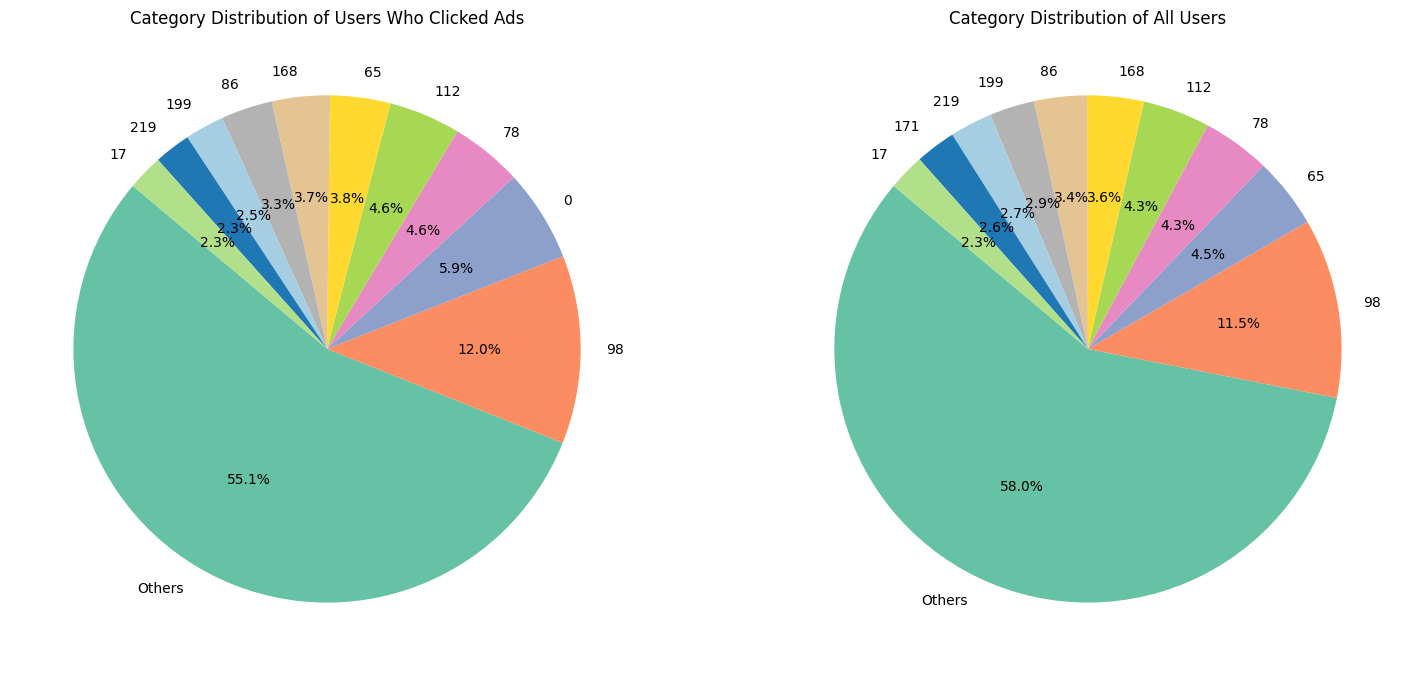

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

value_counts = clicked_data_catinterest['u_newsCatInterestsST_list'].value_counts()
total_sum = value_counts.sum()
big_categories = value_counts[value_counts >= 0.02 * total_sum].index
clicked_data_catinterest['u_newsCatInterestsST_list'].apply(lambda x: x if x in big_categories else 'Others').value_counts().\
    plot.pie(autopct='%1.1f%%', startangle=140, colors=colors, ax = ax1)
ax1.set_title('Category Distribution of Users Who Clicked Ads')
ax1.set_ylabel('') 

value_counts_all = advertiser_data_catinterest['u_newsCatInterestsST_list'].value_counts()
total_sum_all = value_counts_all.sum()
big_categories_all = value_counts_all[value_counts_all >= 0.02 * total_sum_all].index
advertiser_data_catinterest['u_newsCatInterestsST_list'].apply(lambda x: x if x in big_categories_all else 'Others').value_counts().\
    plot.pie(autopct='%1.1f%%', startangle=140, colors=colors, ax = ax2)
ax2.set_title('Category Distribution of All Users')
ax2.set_ylabel('') 

Because of the high dimensionality, We decided to use dummy variables with high difference between users who clicked the ads and all users:

* Uses who clicked the ads has a high proportion of adv_prim_id 1036, hispace_app_tags 43, lower proportion of hispace_app_tags 47, U_feedlifecycle 17 and less refresh time.
* There's no obvious difference in the type between contents clicked and all contents.
* Users prone to click create_type_cd 8, app_second class 18 more and create_type_cd 10, app_second class 14 less.
* There's no difference in engagement patterns between users who cliked the ads and all users.
* Uses who clicked the ads has a high proportion of series group 6, 7, lower proportion of series dev 34, 30, series group 3.
* Uses who clicked the ads has a high proportion of city rank 2, lower proportion of residence 33.
* Uses who clicked the ads has a high proportion of age 5, lower proportion of age 8.
* Uses who clicked the ads has a high proportion of category 0.

In [4]:
# features = ['label', 'age', 'gender', 'city_rank', 'device_size', 'net_type',  'spread_app_id', 'app_second_class', 'app_score', 'u_refreshTimes']

# features_to_generate_dummy_variables = ['residence', 'city', 'series_dev', 'series_group', 'emui_dev', 'device_name','creat_type_cd','inter_type_cd','hispace_app_tags','u_feedLifeCycle']

advertiser_data['adv_prim_id_1036'] = (advertiser_data['adv_prim_id'] == 1036)
advertiser_data['hispace_app_tags_43'] = (advertiser_data['hispace_app_tags'] == 43)
advertiser_data['hispace_app_tags_47'] = (advertiser_data['hispace_app_tags'] == 47)
advertiser_data['creat_type_cd_8'] = (advertiser_data['creat_type_cd'] == 8)
advertiser_data['app_second_class_18'] = (advertiser_data['app_second_class'] == 18)
advertiser_data['creat_type_cd_10'] = (advertiser_data['creat_type_cd'] == 10)
advertiser_data['app_second_class_14'] = (advertiser_data['app_second_class'] == 14)
advertiser_data['series_group_6'] = (advertiser_data['series_group'] == 6)
advertiser_data['series_group_7'] = (advertiser_data['series_group'] == 7)
advertiser_data['series_group_3'] = (advertiser_data['series_group'] == 3)
advertiser_data['series_dev_34'] = (advertiser_data['series_dev'] == 34)
advertiser_data['series_dev_30'] = (advertiser_data['series_dev'] == 30)
advertiser_data['residence_33'] = (advertiser_data['residence'] == 33)
advertiser_data['category_0'] = advertiser_data['u_newsCatInterestsST'].apply(lambda x: '0' in x.split('^'))
train_features = ['label', 'age', 'gender', 'city_rank', 'device_size', 'app_score', 'u_refreshTimes', 
                  'u_feedLifeCycle', 'adv_prim_id_1036', 'hispace_app_tags_43', 'hispace_app_tags_47',
                  'creat_type_cd_8', 'app_second_class_18', 'app_second_class_18', 'creat_type_cd_10',
                  'app_second_class_14', 'series_group_6','series_group_7','series_group_3',
                  'series_dev_34','series_dev_30', 'residence_33', 'category_0']
train_data = advertiser_data[train_features]

In [13]:
train_data_label_1 = train_data[train_data['label'] == 1]
train_data_label_0 = train_data[train_data['label'] == 0]

sampled_label_1 = train_data_label_1.sample(n=5000, random_state=42)
sampled_label_0 = train_data_label_0.sample(n=5000, random_state=42)

sampled_df = pd.concat([sampled_label_1, sampled_label_0])

sampled_df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)
X = sampled_df.iloc[:, 1:]
y = sampled_df.iloc[:, 0]

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.648
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1461
           1       0.67      0.62      0.65      1539

    accuracy                           0.65      3000
   macro avg       0.65      0.65      0.65      3000
weighted avg       0.65      0.65      0.65      3000



In [ ]:
# print(advertiser_data.columns)
# print(publisher_data.columns)

Index(['log_id', 'label', 'user_id', 'age', 'gender', 'residence', 'city',
       'city_rank', 'series_dev', 'series_group', 'emui_dev', 'device_name',
       'device_size', 'net_type', 'task_id', 'adv_id', 'creat_type_cd',
       'adv_prim_id', 'inter_type_cd', 'slot_id', 'site_id', 'spread_app_id',
       'hispace_app_tags', 'app_second_class', 'app_score',
       'ad_click_list_v001', 'ad_click_list_v002', 'ad_click_list_v003',
       'ad_close_list_v001', 'ad_close_list_v002', 'ad_close_list_v003',
       'pt_d', 'u_newsCatInterestsST', 'u_refreshTimes', 'u_feedLifeCycle'],
      dtype='object')
Index(['u_userId', 'u_phonePrice', 'u_browserLifeCycle', 'u_browserMode',
       'u_feedLifeCycle', 'u_refreshTimes', 'u_newsCatInterests',
       'u_newsCatDislike', 'u_newsCatInterestsST', 'u_click_ca2_news',
       'i_docId', 'i_s_sourceId', 'i_regionEntity', 'i_cat', 'i_entities',
       'i_dislikeTimes', 'i_upTimes', 'i_dtype', 'e_ch', 'e_m', 'e_po', 'e_pl',
       'e_rn', 'e_section',